In [86]:
#Import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sqlite3 
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re


In [66]:
#Load data

In [5]:
con=sqlite3.connect('/Users/charanyellanki/Documents/learn/DA/amazon_data_analysis/database.sqlite')

In [8]:
df=pd.read_sql_query('SELECT * FROM Reviews',con)

In [65]:
#Sentiment analysis on product reviews

In [17]:
TextBlob(df.Summary[16]).sentiment.polarity

-0.4

In [18]:
polarity=[]
for i in df.Summary:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [20]:
df['Polarity']=polarity

In [35]:
df_positive=df[df.Polarity>0]

In [36]:
stopwords=set(STOPWORDS)

In [37]:
text_data=(' '.join(df_positive.Summary))

In [38]:
text_data=re.sub('[^a-zA-Z]',' ',text_data)

In [39]:
text_data=re.sub(' +', ' ',text_data)

In [40]:
text_data[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

(-0.5, 999.5, 499.5, -0.5)

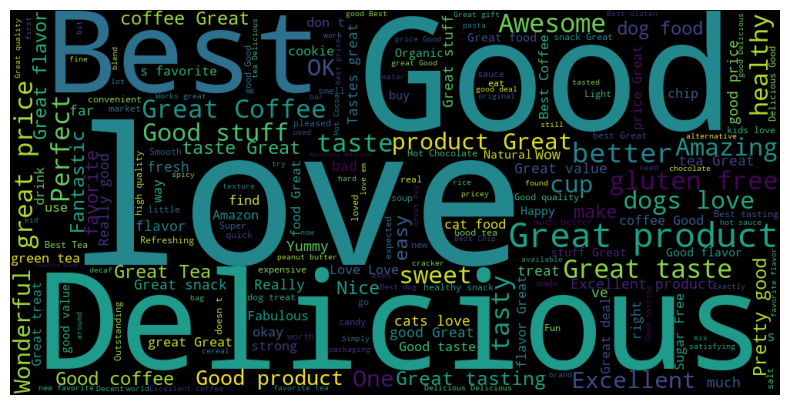

In [44]:
wordcloud=WordCloud(width=1000, height=500, stopwords=stopwords).generate(text_data)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')

In [64]:
#Top 10 Users to recommend products

In [45]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


In [54]:
raw=df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending=False)

In [58]:
raw.columns=['num_summaries','num_text','average_score','num_products_purchased']

In [61]:
user_10=raw.index[0:10]
num_10=raw['num_products_purchased'][0:10]

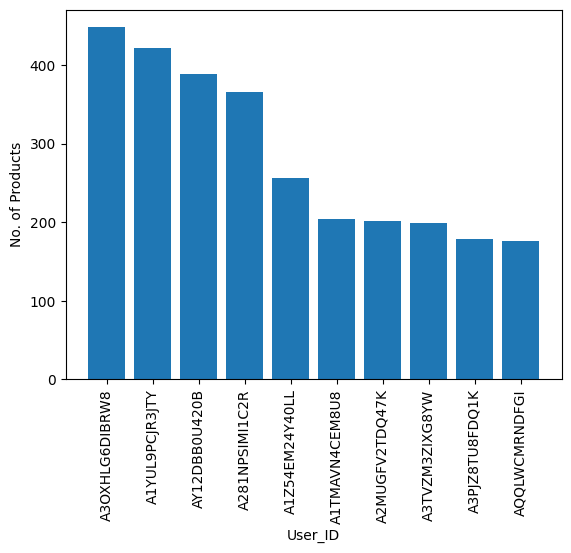

In [63]:
plt.bar(user_10, num_10, label='Users recommended')
plt.xlabel('User_ID')
plt.ylabel('No. of Products')
plt.xticks(rotation='vertical')
plt.show()

In [70]:
#Lengthy or short customer feedback

In [71]:
final=df.sample(10000)

In [72]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
544180,544181,B000MANI6Q,A2K72ZF2YXGJBJ,"Roxalane ""Carol""",1,1,5,1334361600,Best Kettle corn for microwave,This is the best kettle corn for the microwave...,1.0000
312278,312279,B002HFRAN6,A7HH59GHP1XMX,"Allan Halpern ""ahalp2""",0,0,4,1318377600,N-E-S-T-L-E-S,Do you remember the old nestle jingle? n-e-s-t...,0.0000
135719,135720,B003THML30,A2UTXCM0GFO2AN,H. Ayaz,0,0,4,1314921600,The perfect crunch!,This new product packs the perfect crunch into...,1.0000
496945,496946,B005HG9ET0,#oc-R3F0UDHOQC1RNU,Trevor J. Flannigan,0,1,5,1344124800,Exactly What I Wanted...,We were just talking the other day about pH ba...,0.2500
204414,204415,B000SE6JCG,A3R4794K2RVU1S,Danny Yu,0,0,5,1334966400,Good basic taste and long lasting gum,Stride gum is the best at giving you long last...,0.1625


In [73]:
def count_len(text):
    return len(text.split())

In [75]:
final['text_len']=final.Text.apply(count_len)

In [80]:
px.box(final,y='text_len')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'text_len=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': array([46, 45, 40, ..., 31, 25, 42]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'text_len'}}}
})

In [84]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity,text_len
544180,544181,B000MANI6Q,A2K72ZF2YXGJBJ,"Roxalane ""Carol""",1,1,5,1334361600,Best Kettle corn for microwave,This is the best kettle corn for the microwave...,1.0000,46
312278,312279,B002HFRAN6,A7HH59GHP1XMX,"Allan Halpern ""ahalp2""",0,0,4,1318377600,N-E-S-T-L-E-S,Do you remember the old nestle jingle? n-e-s-t...,0.0000,45
135719,135720,B003THML30,A2UTXCM0GFO2AN,H. Ayaz,0,0,4,1314921600,The perfect crunch!,This new product packs the perfect crunch into...,1.0000,40
496945,496946,B005HG9ET0,#oc-R3F0UDHOQC1RNU,Trevor J. Flannigan,0,1,5,1344124800,Exactly What I Wanted...,We were just talking the other day about pH ba...,0.2500,75
204414,204415,B000SE6JCG,A3R4794K2RVU1S,Danny Yu,0,0,5,1334966400,Good basic taste and long lasting gum,Stride gum is the best at giving you long last...,0.1625,44


In [87]:
sns.countplot(final['Score'])

KeyError: 0

In [104]:
#Analyze behavior of customers

In [93]:
import string 
punctuation=string.punctuation

def clean_text(text):
    pun=' '
    for char in text:
        if char not in punctuation:
            pun = pun+char

In [94]:
final['Text']=final['Text'].apply(clean_text)

In [96]:
import nltk
from nltk.corpus import stopwords

In [99]:
re=[word for word in data.split(' ') if word not in set(stopwords.word('english'))]

NameError: name 'data' is not defined

In [100]:
def remove_stopwords(data):
    return ' '.join([word for word in data.split(' ') if word not in set(stopwords.word('english'))])

In [102]:
final.isnull().sum()

Id                            0
ProductId                     0
UserId                        0
ProfileName                   0
HelpfulnessNumerator          0
HelpfulnessDenominator        0
Score                         0
Time                          0
Summary                       0
Text                      10000
Polarity                      0
text_len                      0
dtype: int64

In [103]:
final['Summary']=final['Summary'].apply(remove_stopwords)

AttributeError: 'WordListCorpusReader' object has no attribute 'word'